# Analyzing Movie Reviews

Using fandango_score_comparison.csv dataset from 538.  Each row in dataset is a movie, and each column is a rating from a different site.  Some important columns:

* FILM -- the name of the movie.
* RottenTomatoes -- the RottenTomatoes (RT) critic score.
* RottenTomatoes_User -- the RT user score.
* Metacritic -- the Metacritic critic score.
* Metacritic_User -- the Metacritic user score.
* IMDB -- the IMDB score given to the movie.
* Fandango_Stars -- the number of stars Fandango gave the movie.

To make comparison easier, columns are normalized from 1-5 (look for corresponding column ending in "_norm").  Any column ending in _round is normalized value rounded to nearest 0.5

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")
print(movies.columns.values)

['FILM' 'RottenTomatoes' 'RottenTomatoes_User' 'Metacritic'
 'Metacritic_User' 'IMDB' 'Fandango_Stars' 'Fandango_Ratingvalue' 'RT_norm'
 'RT_user_norm' 'Metacritic_norm' 'Metacritic_user_nom' 'IMDB_norm'
 'RT_norm_round' 'RT_user_norm_round' 'Metacritic_norm_round'
 'Metacritic_user_norm_round' 'IMDB_norm_round'
 'Metacritic_user_vote_count' 'IMDB_user_vote_count' 'Fandango_votes'
 'Fandango_Difference']


In [2]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


(0, 5)

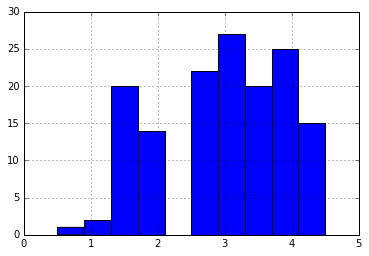

In [3]:
# Histogram of normalized metacritic ratings
ax = movies['Metacritic_norm_round'].hist()
ax.set_xlim(0,5)

(0, 5)

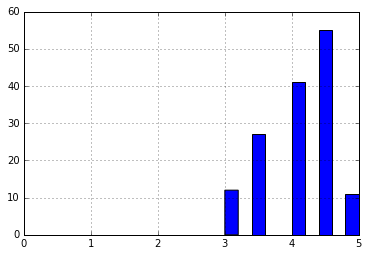

In [4]:
# Histogram of Fandango stars
ax = movies['Fandango_Stars'].hist()
ax.set_xlim(0,5)

Fandango stars rating are skewed towards higher ratings (interesting as Fandango is in the business of making money

Comparing metrics between Fandango_Stars and Metacritic_norm_round

In [5]:
fand_mean = movies["Fandango_Stars"].mean()
fand_med = movies["Fandango_Stars"].median()
fand_std = movies["Fandango_Stars"].std()

meta_mean = movies["Metacritic_norm_round"].mean()
meta_med = movies["Metacritic_norm_round"].median()
meta_std = movies["Metacritic_norm_round"].std()

print("Fandango\nMean: {:.2f}\nMedian: {:.2f}\nStD: {:.2f}\n\nMetacritic\nMean: {:.2f}\nMedian: {:.2f}\nStD: {:.2f}".format(fand_mean,fand_med,fand_std,meta_mean,meta_med,meta_std))




Fandango
Mean: 4.09
Median: 4.00
StD: 0.54

Metacritic
Mean: 2.97
Median: 3.00
StD: 0.99


Fandango has much higher median/mean values with a tighter spread of data than Metacritic.  This is because Fandango values are essentially between 3-5 while metacritic varies between 0-5

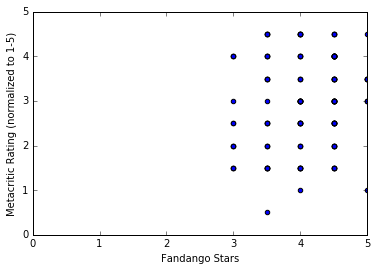

In [6]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
ax = plt.gca()
ax.set_ylim(0,5)
ax.set_xlabel("Fandango Stars")
ax.set_xlim(0,5)
ax.set_ylabel("Metacritic Rating (normalized to 1-5)")


In [7]:
movies['fm_diff'] = abs(movies['Fandango_Stars'] - movies["Metacritic_norm_round"])

movies.sort_values(by="fm_diff",ascending=False, inplace=True)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [8]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

r_value

0.17844919073895918

There is very poor correlation between Metacritic and Fandango ratings

In [13]:
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

print("y = {:.2f}x + {:.2f}".format(slope,intercept))
print("r = {:.3f}".format(rvalue))
print("p = {:.3f}".format(pvalue))
print("stderr = {:.3f}".format(stderr))

y = 0.10x + 3.80
r = 0.178
p = 0.031
stderr = 0.045


In [14]:
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

## Finding residuals

In [ ]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
plt.plot()

In [10]:
# Recreating above numbers manually

meta = movies['Metacritic_norm_round']
fand = movies['Fandango_Stars']

meta_mean = meta.mean()
fand_mean = fand.mean()
print(meta_mean,fand_mean)

meta_var = sum([(i-meta_mean)**2 for i in meta])/len(meta)
fand_var = sum([(i-fand_mean)**2 for i in fand])/len(fand)
print(meta_var,fand_var)

meta_std = meta_var ** 0.5
fand_std = fand_var ** 0.5
print(meta_std,fand_std)

covar = sum([(meta[i] - meta_mean) * (fand[i] - fand_mean) for i in range(len(meta))])/(len(meta)-1)
print(covar)

r = covar/(meta_std*fand_std)
print(r)

slope = covar/meta_var
print(slope)

intercept = fand_mean - (meta_mean*slope)
print(intercept)

#calculating pearson correlation for a sample (above is for a population)
denom_1 = (meta_var * len(meta)) ** 0.5
denom_2 = (fand_var * len(fand)) ** 0.5

sample_r = sum([(meta[i]-meta_mean)*(fand[i]-fand_mean) for i in range(len(meta))])/(denom_1*denom_2)
print(sample_r)

def predict_fand(meta_value):
    return meta_value*slope + intercept

rss = sum([(predict_fand(meta[i])-fand[i])**2 for i in range(len(meta))])
stderr = (rss/(len(meta)-2)) ** 0.5
print(rss,stderr)


2.97260273973 4.08904109589
0.97527678739 0.290016888722
0.987561029704 0.53853216127
0.0955597543694
0.179679874813
0.0979821888565
3.79777897285
0.178449190739
40.9941715919 0.533555758254


In [11]:
# Compare above values to those automatically calculated with numpy in python

import numpy as np

print(np.mean(meta),np.mean(fand))
print(np.var(meta),np.var(fand))
print(np.std(meta),np.std(fand))

print(np.cov(meta,fand)[0,1])

print(pearsonr(meta,fand)[0])

auto_slope, auto_intercept, auto_rvalue, auto_pvalue, auto_stderr = linregress(meta,fand)

print(auto_slope, auto_intercept, auto_rvalue, auto_pvalue, auto_stderr)

2.97260273973 4.08904109589
0.97527678739 0.290016888722
0.987561029704 0.53853216127
0.0955597543694
0.178449190739
0.0973110779739 3.7997739189 0.178449190739 0.0311615162285 0.0447135446568
